In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
xtrain = pd.read_csv('X-train.csv',header =None)
ytrain = pd.read_csv('Y-train.csv',header =None)

In [3]:
whole = pd.concat([xtrain,ytrain],axis=1)
whole.columns = list(xtrain.columns)+['class']
whole.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,class
0,14.1,2.0,4.3,0.469,1.0,2.8,0.371,1.0,0.651,0.6,0.788,0.788,0.5,2.1,0.4,0.3,0.3,1.8,5.6,1
1,5.6,0.4,1.7,0.250,0.1,0.9,0.167,0.3,0.333,0.1,0.500,0.500,0.4,0.6,0.1,0.2,0.1,0.2,1.1,3
2,33.8,7.3,14.4,0.505,1.8,5.6,0.325,5.5,0.618,4.4,0.885,0.885,1.7,6.5,5.3,0.8,0.7,3.9,20.8,1
3,37.8,9.8,19.2,0.512,3.3,7.9,0.414,6.5,0.581,4.6,0.944,0.944,1.2,3.9,6.6,1.2,0.4,3.1,27.5,2
4,11.4,2.6,5.0,0.520,0.8,2.4,0.333,1.8,0.692,0.2,1.000,1.000,0.2,1.6,2.0,1.0,0.2,1.0,6.2,4


In [5]:
def gausdense(cat,x):
    exp = np.dot(np.transpose(x-means[cat]),np.linalg.inv(cs[cat]))
    exp = np.dot(exp,x-means[cat])
    exp *= -0.5
    print(exp)
    top = (math.e)**exp
    print(top)
    bot = (np.linalg.det(cs[cat])**0.5)*((2*math.pi)**(len(xtrain.columns)/2))
    print(bot)
    return top/bot

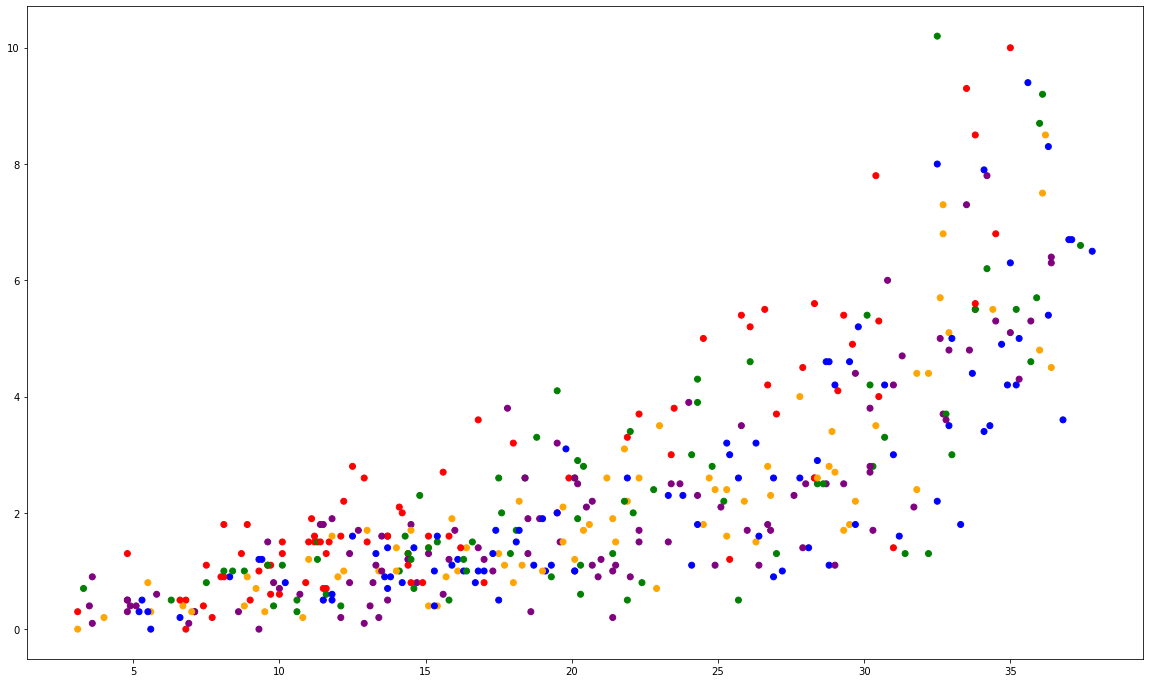

In [39]:
plt.figure(figsize = (20,12))
colors = {0:'red', 1:'green', 2:'blue', 3:'orange', 4:'purple'}
tempx = xtrain#[xtrain[3]<=0.69]
tempy = ytrain#[xtrain[3]<=0.69]

#tempy = tempy[tempx[4]>2.5]
#tempx = tempx[tempx[4]>2.5]

plt.scatter(x=tempx[0],y=tempx[7],c=tempy[0].map(colors))

In [ ]:
#one decision factor per feature

In [200]:
class treemis:
    def __init__(self,x,y,cat):
        self.x = x
        self.y = y
        self.cat = cat
        if self.y[0].nunique() > 1 and len(self.y[0])>1:
            self.det = self.x[self.cat].min()
            self.rans = sorted(self.x[cat].unique())[1:]
            minuncs = np.inf
            uncs = {}
            self.samp = []
            for i in self.rans:
                temp = self.unc(self.x, self.y, i,self.y[0].unique())
                self.samp.append(temp)
                if minuncs>temp:
                    minuncs = temp
                uncs[temp] = i
                if temp == 0:
                    self.det=i
                    break
            if minuncs == np.inf:
                self.left = None
                self.right = None
            elif self.cat<18:
                self.det = uncs[minuncs]
                self.left = tree(x[x[cat]<self.det],y[x[cat]<self.det],cat+1)
                self.right = tree(x[x[cat]>=self.det],y[x[cat]>=self.det],cat+1)
            else:
                self.left = None
                self.right = None
        else:
            self.left = None
            self.right = None
        
            
    def unc(self,x,y,det,pc):
        if det == None:
            if len(y)==0:
                return 0
            ps=[]
            for i in pc:
                ps.append((y[0]==i).mean())
            return min(ps)
        
        left = y[x[self.cat] < det]
        right =  y[x[self.cat] >= det]
        
        if len(left)==0 or len(right)==0:
            return np.inf
        return (x[self.cat] < det).mean()*self.unc(None,left,None,y[0].unique()) + \
    (x[self.cat] >= det).mean()*self.unc(None,right,None,y[0].unique())
    
    def pred(self, x):
        if len(self.y[0].unique())==1:
            return self.y[0].unique()[0]
        if self.left == None and self.right == None:
            cats = list(self.y[0].unique())
            out = cats[0]
            curr = 0
            for i in cats:
                temp = (self.y[0]==i).mean()
                if temp>curr:
                    curr = temp
                    out = i
            return out
        else:
            if x[self.cat]<self.det:
                return self.left.pred(x)
            else:
                return self.right.pred(x)
    def prediction(self, x):
        newx = x.copy()
        out = []
        for i in range(len(x)):
            out.append(self.pred(x.iloc[i]))
        newx.insert(2,'out', out, True)
        return newx['out']

In [201]:
class treegini:
    def __init__(self,x,y,cat):
        self.x = x
        self.y = y
        self.cat = cat
        if self.y[0].nunique() > 1 and len(self.y[0])>1:
            self.det = self.x[self.cat].min()
            self.rans = sorted(self.x[cat].unique())[1:]
            minuncs = np.inf
            uncs = {}
            self.samp = []
            for i in self.rans:
                temp = self.unc(self.x, self.y, i,self.y[0].unique())
                self.samp.append(temp)
                if minuncs>temp:
                    minuncs = temp
                uncs[temp] = i
                if temp == 0:
                    self.det=i
                    break
            if minuncs == np.inf:
                self.left = None
                self.right = None
            elif self.cat<18:
                self.det = uncs[minuncs]
                self.left = tree(x[x[cat]<self.det],y[x[cat]<self.det],cat+1)
                self.right = tree(x[x[cat]>=self.det],y[x[cat]>=self.det],cat+1)
            else:
                self.left = None
                self.right = None
        else:
            self.left = None
            self.right = None
        
            
    def unc(self,x,y,det,pc):
        if det == None:
            if len(y)==0:
                return 0
            ps=[]
            for i in pc:
                ps.append((y[0]==i).mean()**2)
            return 1-sum(ps)
        
        left = y[x[self.cat] < det]
        right =  y[x[self.cat] >= det]
        
        if len(left)==0 or len(right)==0:
            return np.inf
        return (x[self.cat] < det).mean()*self.unc(None,left,None,y[0].unique()) + \
    (x[self.cat] >= det).mean()*self.unc(None,right,None,y[0].unique())
    
    def pred(self, x):
        if len(self.y[0].unique())==1:
            return self.y[0].unique()[0]
        if self.left == None and self.right == None:
            cats = list(self.y[0].unique())
            out = cats[0]
            curr = 0
            for i in cats:
                temp = (self.y[0]==i).mean()
                if temp>curr:
                    curr = temp
                    out = i
            return out
        else:
            if x[self.cat]<self.det:
                return self.left.pred(x)
            else:
                return self.right.pred(x)
    def prediction(self, x):
        newx = x.copy()
        out = []
        for i in range(len(x)):
            out.append(self.pred(x.iloc[i]))
        newx.insert(2,'out', out, True)
        return newx['out']

In [202]:
#find the column with determine factor with the lowest uncertainty everytime

In [203]:
class tree2mis:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        currunc = self.unc(None,self.y,None,self.y[0].unique(),None)
        if self.y[0].nunique() > 1 and len(self.y[0])>1 and currunc>0:
            self.det = -1*np.inf
            self.cat = 0
            minuncs = np.inf
            for cat in self.x.columns:
                self.rans = sorted(self.x[cat].unique())[1:]
                uncs = {}
                for i in self.rans:
                    temp = self.unc(self.x, self.y, i, self.y[0].unique(),cat)
                    if minuncs>temp:
                        minuncs = temp
                        self.det = i
                        self.cat = cat
                    if temp == 0:
                        self.det=i
                        self.cat = cat
                        minuncs = 0
                        break
                if minuncs == 0:
                    break
            if minuncs == np.inf:
                self.left = None
                self.right = None
            elif self.det != -1*np.inf:
                self.left = tree2(x[x[self.cat]<self.det],y[x[self.cat]<self.det])
                self.right = tree2(x[x[self.cat]>=self.det],y[x[self.cat]>=self.det])
            else:
                self.left = None
                self.right = None
        else:
            self.left = None
            self.right = None
        
            
    def unc(self,x,y,det,pc,cat):
        if det == None:
            if len(y)==0:
                return 0
            ps=[]
            for i in pc:
                ps.append((y[0]==i).mean())
            return min(ps)
        
        left = y[x[cat] < det]
        right =  y[x[cat] >= det]
        
        if len(left)==0 or len(right)==0:
            return np.inf
        return (x[cat] < det).mean()*self.unc(None,left,None,y[0].unique(),cat) + \
    (x[cat] >= det).mean()*self.unc(None,right,None,y[0].unique(),cat)
    
    def pred(self, x):
        if len(self.y[0].unique())==1:
            return self.y[0].unique()[0]
        if self.left == None and self.right == None:
            cats = list(self.y[0].unique())
            out = cats[0]
            curr = 0
            for i in cats:
                temp = (self.y[0]==i).mean()
                if temp>curr:
                    curr = temp
                    out = i
            return out
        else:
            if x[self.cat]<self.det:
                return self.left.pred(x)
            else:
                return self.right.pred(x)
    def prediction(self, x):
        newx = x.copy()
        out = []
        for i in range(len(x)):
            out.append(self.pred(x.iloc[i]))
        newx.insert(2,'out', out, True)
        return newx['out']

In [204]:
class tree2gini:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        currunc = self.unc(None,self.y,None,self.y[0].unique(),None)
        if self.y[0].nunique() > 1 and len(self.y[0])>1 and currunc>0:
            self.det = -1*np.inf
            self.cat = 0
            minuncs = np.inf
            for cat in self.x.columns:
                self.rans = sorted(self.x[cat].unique())[1:]
                uncs = {}
                for i in self.rans:
                    temp = self.unc(self.x, self.y, i, self.y[0].unique(),cat)
                    if minuncs>temp:
                        minuncs = temp
                        self.det = i
                        self.cat = cat
                    if temp == 0:
                        self.det=i
                        self.cat = cat
                        minuncs = 0
                        break
                if minuncs == 0:
                    break
            if minuncs == np.inf:
                self.left = None
                self.right = None
            elif self.det != -1*np.inf:
                self.left = tree2(x[x[self.cat]<self.det],y[x[self.cat]<self.det])
                self.right = tree2(x[x[self.cat]>=self.det],y[x[self.cat]>=self.det])
            else:
                self.left = None
                self.right = None
        else:
            self.left = None
            self.right = None
        
            
    def unc(self,x,y,det,pc,cat):
        if det == None:
            if len(y)==0:
                return 0
            ps=[]
            for i in pc:
                ps.append((y[0]==i).mean()**2)
            return 1-sum(ps)
        
        left = y[x[cat] < det]
        right =  y[x[cat] >= det]
        
        if len(left)==0 or len(right)==0:
            return np.inf
        return (x[cat] < det).mean()*self.unc(None,left,None,y[0].unique(),cat) + \
    (x[cat] >= det).mean()*self.unc(None,right,None,y[0].unique(),cat)
    
    def pred(self, x):
        if len(self.y[0].unique())==1:
            return self.y[0].unique()[0]
        if self.left == None and self.right == None:
            cats = list(self.y[0].unique())
            out = cats[0]
            curr = 0
            for i in cats:
                temp = (self.y[0]==i).mean()
                if temp>curr:
                    curr = temp
                    out = i
            return out
        else:
            if x[self.cat]<self.det:
                return self.left.pred(x)
            else:
                return self.right.pred(x)
    def prediction(self, x):
        newx = x.copy()
        out = []
        for i in range(len(x)):
            out.append(self.pred(x.iloc[i]))
        newx.insert(2,'out', out, True)
        return newx['out']

In [167]:
mod = tree2(xtrain,ytrain)

In [160]:
trainx = xtrain.iloc[:-100]
trainy = ytrain.iloc[:-100]
validx = xtrain.iloc[-100:]
validy = ytrain.iloc[-100:]

In [186]:
mod = tree2(trainx,trainy)

In [188]:
pred = mod.prediction(validx)
pred

327    4
328    4
329    3
330    1
331    3
      ..
422    4
423    1
424    2
425    3
426    2
Name: out, Length: 100, dtype: int64

In [189]:
(pred == validy[0]).mean()

0.39

In [132]:
from sklearn.model_selection import KFold

In [206]:
kf = KFold(n_splits=10)

In [207]:
#missclassificaiton

In [208]:
accs=[]
for i, (train_index, test_index) in enumerate(kf.split(xtrain)):
    mod = treemis(xtrain.iloc[train_index],ytrain.iloc[train_index], 0)
    prediction = mod.prediction(xtrain.iloc[test_index])
    accs.append((prediction == ytrain.iloc[test_index][0]).mean())
    print((prediction == ytrain.iloc[test_index][0]).mean())
np.mean(accs)

0.3488372093023256
0.27906976744186046
0.3953488372093023
0.37209302325581395
0.27906976744186046
0.2558139534883721
0.3488372093023256
0.3333333333333333
0.23809523809523808
0.35714285714285715


0.32076411960132895

In [209]:
#gini index

In [210]:
accs=[]
for i, (train_index, test_index) in enumerate(kf.split(xtrain)):
    mod = treegini(xtrain.iloc[train_index],ytrain.iloc[train_index], 0)
    prediction = mod.prediction(xtrain.iloc[test_index])
    accs.append((prediction == ytrain.iloc[test_index][0]).mean())
    print((prediction == ytrain.iloc[test_index][0]).mean())
np.mean(accs)

0.2558139534883721
0.27906976744186046
0.2558139534883721
0.46511627906976744
0.37209302325581395
0.5116279069767442
0.3023255813953488
0.2857142857142857
0.3333333333333333
0.2857142857142857


0.3346622369878184

In [211]:
# misclassificaiton

In [212]:
accs=[]
for i, (train_index, test_index) in enumerate(kf.split(xtrain)):
    mod = tree2mis(xtrain.iloc[train_index],ytrain.iloc[train_index])
    prediction = mod.prediction(xtrain.iloc[test_index])
    accs.append((prediction == ytrain.iloc[test_index][0]).mean())
    print((prediction == ytrain.iloc[test_index][0]).mean())
np.mean(accs)

0.4186046511627907
0.27906976744186046
0.37209302325581395
0.627906976744186
0.4186046511627907
0.4883720930232558
0.4186046511627907
0.38095238095238093
0.5238095238095238
0.4523809523809524


0.4380398671096345

In [ ]:
## gini index

In [213]:
accs=[]
for i, (train_index, test_index) in enumerate(kf.split(xtrain)):
    mod = tree2gini(xtrain.iloc[train_index],ytrain.iloc[train_index])
    prediction = mod.prediction(xtrain.iloc[test_index])
    accs.append((prediction == ytrain.iloc[test_index][0]).mean())
    print((prediction == ytrain.iloc[test_index][0]).mean())
np.mean(accs)

0.37209302325581395
0.3023255813953488
0.37209302325581395
0.5116279069767442
0.4418604651162791
0.3488372093023256
0.37209302325581395
0.38095238095238093
0.5238095238095238
0.4523809523809524


0.40780730897009965

In [130]:
xtest = pd.read_csv('X-test.csv',header =None)

In [214]:
actmod = tree2mis(xtrain,ytrain)

In [215]:
ytest = actmod.prediction(xtest)

In [217]:
f = open("predictions.csv", "a")
for i in ytest:
    f.write(str(i)+'\n')
f.close()

In [ ]:
#2

In [219]:
temp = [65,72,79,55,62,71,73]
pressure = [1001,1003,1030,1022,1025,1010,1011]
rain = [1,1,0,1,0,1,0]

In [220]:
raindf = pd.DataFrame({'temp':temp,'pres':pressure,'rain':rain})

In [221]:
import matplotlib.pyplot as plt

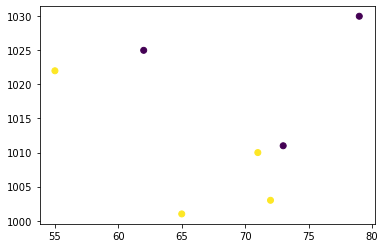

In [222]:
plt.scatter(raindf['temp'], raindf['pres'], c=raindf['rain'])

In [232]:
# is rain < 73

In [233]:
#yes node of first question node

In [245]:
yesnode = raindf[raindf['temp']<73]
yesnode

,temp,pres,rain
0,65,1001,1
1,72,1003,1
3,55,1022,1
4,62,1025,0
5,71,1010,1


In [246]:
#no node of first question node

In [247]:
raindf[raindf['temp']>=73]

,temp,pres,rain
2,79,1030,0
6,73,1011,0


In [248]:
# following question node to first yes node
# is pressure <1023

In [249]:
#yes node of previous question node

In [250]:
yesnode[yesnode['pres']<1023]

,temp,pres,rain
0,65,1001,1
1,72,1003,1
3,55,1022,1
5,71,1010,1


In [ ]:
# no node of previous quesion node

In [251]:
yesnode[yesnode['pres']>=1023]

,temp,pres,rain
4,62,1025,0
